# Vanilla Artificial Neural Network
 <br>
### The following exercises are intended to introduce the concept of Artificial Neural Networks (ANN) by presenting mathematical concepts and providing a hands-on example

Disclaimer: We restrict the weights to be vectors instead of matrices. This will simplify the calculations. In the lecture you will learn a more general and elegant way of calculating the updates of the parameters (the so called backpropagation algorithm). The following exercises are intended as a warm-up for the things to come :)

## Task 1
For all tasks below: show Your calculation steps! <br>
## Vector Calculus
Given are vectors $\mathbf{a}, \mathbf{x} \in \mathbb{R}^d$ and a matrix $\mathbf{W} \in \mathbb{R}^{m \times d}$
<br>
What is <br>
(A1)     $\frac{\partial \mathbf{x}}{\partial \mathbf{x}} = 
\begin{bmatrix} 
\frac{\partial x_1}{\partial x_1} & \frac{\partial x_1}{\partial x_2} & \dots & \frac{\partial x_1}{\partial x_d} \\ 
\frac{\partial x_2}{\partial x_1} & \frac{\partial x_2}{\partial x_2} & \dots & \frac{\partial x_2}{\partial x_d} \\ 
\vdots & \vdots & \ddots & \vdots \\ 
\frac{\partial x_d}{\partial x_1} & \frac{\partial x_d}{\partial x_1} & \dots & \frac{\partial x_d}{\partial x_d} 
\end{bmatrix} = 
\begin{bmatrix} 
1 & 0 & \dots & 0 \\ 
0 & 1 & \dots & 0 \\ 
\vdots & \vdots & \ddots & \vdots \\ 
0 & 0 & \dots & 1 
\end{bmatrix} = 
\mathbf{E} \quad \text{Identity matrix}$

(A2)     $\frac{\partial \mathbf{a}^T \mathbf{x}}{\partial \mathbf{x}} \quad \text{with chain rule we know} \\
\frac{\partial \mathbf{a}^T \mathbf{x}}{\partial \mathbf{x}} = \frac{\partial \mathbf{a}^T}{\partial \mathbf{x}} \mathbf{x} + \frac{\partial \mathbf{x}^T}{\partial \mathbf{x}} \mathbf{a} \\
\frac{\partial \mathbf{a}^T \mathbf{x}}{\partial \mathbf{x}} = \mathbf{0} + \frac{\partial \mathbf{x}^T}{\partial \mathbf{x}} \mathbf{a} \\
\frac{\partial \mathbf{a}^T \mathbf{x}}{\partial \mathbf{x}} = \frac{\partial \mathbf{x}^T}{\partial \mathbf{x}} \mathbf{a} \\
\frac{\partial \mathbf{a}^T \mathbf{x}}{\partial \mathbf{x}} = \mathbf{E} \> \mathbf{a} \quad \text{weil} \quad \frac{\partial \mathbf{x}^T}{\partial \mathbf{x}} = \frac{\partial \mathbf{x}}{\partial \mathbf{x}^T} \\
\frac{\partial \mathbf{a}^T \mathbf{x}}{\partial \mathbf{x}} = \mathbf{a} 
$ <br>


(A3)     $\frac{\partial \mathbf{W} \mathbf{x}}{\partial \mathbf{x}} \quad \text{with chain rule we know} \\
\frac{\partial \mathbf{W} \mathbf{x}}{\partial \mathbf{x}} = \frac{\partial \mathbf{W}}{\partial \mathbf{x}} \mathbf{x} + \frac{\partial \mathbf{x}^T}{\partial \mathbf{x}} \mathbf{W}^T \\ 
\frac{\partial \mathbf{W} \mathbf{x}}{\partial \mathbf{x}} = \mathbf{0} + \frac{\partial \mathbf{x}^T}{\partial \mathbf{x}} \mathbf{W}^T \quad \text{analogously to (A2)} \\
\frac{\partial \mathbf{W} \mathbf{x}}{\partial \mathbf{x}} = \mathbf{E} \> \mathbf{W}^T \\
\frac{\partial \mathbf{W} \mathbf{x}}{\partial \mathbf{x}} = \mathbf{W}^T
$<br>


## Derivative of activation functions
Activation functions are a crucial part of ANNs. You will learn more about them later. For now You should calculate the derivative of two of them.
For $t \in \mathbb{R}$ <br>
(B1) Calculate the derivative of the sigmoid function 
\begin{align}
    \sigma(t) &= \frac{1}{1 + e^{-t}} \\
    \sigma(t) &= (1 + e^{-t})^{-1} \\
    \\
    \frac{\partial \sigma(t)}{\partial t} &= \frac{(1 + e^{-t})^{-1}}{\partial t} \\
    &= -(1 + e^{-t})^{-2} \cdot -e^{-t} \\
    &= \frac{e^{-t}}{(1 + e^{-t})^{2}} \\
    &= \sigma(t) \cdot \frac{e^{-t}}{1 + e^{-t}} \\
    &= \sigma(t) \cdot \frac{e^{-t} + 1 - 1}{1 + e^{-t}} \\
    &= \sigma(t) \cdot \frac{1 + e^{-t} - 1}{1 + e^{-t}} \\
    &= \sigma(t) \cdot \left( \frac{1 + e^{-t}}{1 + e^{-t}} - \frac{1}{1 + e^{-t}} \right) \\
    &= \sigma(t) \cdot \left( 1 - \frac{1}{1 + e^{-t}} \right) \\
    &= \sigma(t) \cdot (1 - \sigma(t))
\end{align}
(B2) Calculate the derivative of the function called "rectified linear unit"

Convention for (B2): we set the derivative to $0$ at $t=0$.
\begin{align}
    f(t) = max\{0,t\} =
    \begin{cases}
      t & \text{if}\ t>0 \\
      0 & \text{otherwise}
    \end{cases}
\end{align}

\begin{align}
    f'(t) 
    &=
    \begin{cases}
      \frac{\partial t}{\partial t} & \text{if}\ t>0 \\
      0 & \text{otherwise}
    \end{cases}
    &= 
    \begin{cases}
      1 & \text{if}\ t>0 \\
      0 & \text{otherwise}
    \end{cases}
\end{align}

## Combining the two above
Suppose we apply the sigmoid activation function element wise to a vector:
\begin{align}
    \mathbf{a} = \sigma(\mathbf{x}) =  (\sigma(x_i))_{i=1,\ldots,d} 
\end{align}
What is <br>
(C1)  $\frac{\partial \mathbf{a}}{\partial \mathbf{x}} = 
\begin{bmatrix} 
\frac{\partial \sigma(x_1)}{\partial x_1} & \frac{\partial \sigma(x_1)}{\partial x_2} & \dots & \frac{\partial \sigma(x_1)}{\partial x_d} \\ 
\frac{\partial \sigma(x_2)}{\partial x_1} & \frac{\partial \sigma(x_2)}{\partial x_2} & \dots & \frac{\partial \sigma(x_2)}{\partial x_d} \\ 
\vdots & \vdots & \ddots & \vdots \\ 
\frac{\partial \sigma(x_d)}{\partial x_1} & \frac{\partial \sigma(x_d)}{\partial x_1} & \dots & \frac{\partial \sigma(x_d)}{\partial x_d} 
\end{bmatrix} = 
\begin{bmatrix} 
\sigma(x_1) \cdot (1 - \sigma(x_1)) & 0 & \dots & 0 \\ 
0 & \sigma(x_2) \cdot (1 - \sigma(x_2)) & \dots & 0 \\ 
\vdots & \vdots & \ddots & \vdots \\ 
0 & 0 & \dots & \sigma(x_d) \cdot (1 - \sigma(x_d)) 
\end{bmatrix}$
<br>

(C2) How does the derivative look like if we use the "rectified linear unit" instead of the sigmoid function? 

$\begin{bmatrix} 
\begin{cases}
      1 & \text{if}\ x_1>0 \\
      0 & \text{otherwise}
    \end{cases} & 0 & \dots & 0 \\ 
0 & \begin{cases}
      1 & \text{if}\ x_2>0 \\
      0 & \text{otherwise}
    \end{cases} & \dots & 0 \\ 
\vdots & \vdots & \ddots & \vdots \\ 
0 & 0 & \dots & \begin{cases}
      1 & \text{if}\ x_d>0 \\
      0 & \text{otherwise}
    \end{cases}
\end{bmatrix}$


We are considering a simple ANN   
\begin{align}
f: \mathbb{R} & \rightarrow \mathbb{R} \\
    x  \mapsto \mathbf{w}^{(2)} \sigma(\mathbf{w}^{(1)}& x + \mathbf{b}^{(1)}) + b^{(2)}
\end{align}

It consists of one hidden layer $\mathbf{w}^{(1)} \in \mathbb{R}^{d \times 1}$, one output layer $\mathbf{w}^{(2)} \in \mathbb{R}^{1\times d}$ and the two biases $\mathbf{b}^{(1)} \in \mathbb{R}^{d}$ and $\mathbf{b}^{(2)} \in \mathbb{R}$ (sometimes also called thresholds). The activation function $\sigma$ is given by the sigmoid function
\begin{align}
\sigma: \mathbb{R} \rightarrow \mathbb{R} \\
    t \mapsto \frac{1}{1 + e^{-t}}
\end{align}
and is applied pointwise to the vector $\mathbf{w}^{(1)}x + \mathbf{b}^{(1)}$ (i.e. on every entry).
Below there is a depiction of our network $f(x)$.

<img src="simpleANN.png">
<br>

We are given training data $\mathcal{Z} = \{ (y_1,x_1), \ldots, (y_{n},x_{n}) \}$. The loss for the i-th sample pair is given by the mean squared error:
\begin{align}
    L(y_i, x_i) = \frac{1}{2} (f(x_i)- y_i)^2
\end{align}

Hence our setting is a nonlinear regression task.

## Task 2 - Derive the gradient descent (GD) updates for the parameters
To do that, you have to take the derivative of the loss function w.r.t. the parameters:
\begin{align}
    \frac{\partial L}{\partial \mathbf{w}^{(1)}},
    \frac{\partial L}{\partial \mathbf{w}^{(2)}}, 
    \frac{\partial L}{\partial \mathbf{b}^{(1)}} \quad and \quad
    \frac{d L}{d b^{(2)}}
\end{align}
With the learning rate $\eta$ the gradient descent (GD) update then is given by
\begin{align}
    \mathbf{w}^{(\bullet)} = \mathbf{w}^{(\bullet)} - \eta \frac{\partial L}{\partial \mathbf{w}^{(\bullet)}}
\end{align}
and
\begin{align}
    \mathbf{b}^{(\bullet)} = \mathbf{b}^{(\bullet)} - \eta \frac{\partial L}{\partial \mathbf{b}^{(\bullet)}}
\end{align}

where the dot $\bullet$ is a placeholder for 1 and 2.
<br>
<br>
Tipp: use the chain rule! If you feel puzzled by the vector derivative, think it through with one vector element $w_{i}$, i.e. how does $\frac{\partial L}{\partial w_{i}^{(\bullet)}}$ look like? (where $w_{i}$ is the i-th element of $\mathbf{w}^{(\bullet)}$ )

\begin{align}
\frac{\partial L}{\partial f(\mathbf{x})} 
&= \frac{\partial \frac{1}{2} \cdot \left( f(\mathbf{x})-\mathbf{y} \right)^2}{\partial f(\mathbf{x})} \\
&= \frac{1}{2} \cdot \left( \frac{\partial (f(\mathbf{x})-\mathbf{y})^2}{\partial f(\mathbf{x})-\mathbf{y}} \right)  \frac{\partial f(\mathbf{x})-\mathbf{y}}{\partial f(\mathbf{x})} \\
&= (f(\mathbf{x}) - \mathbf{y}) \left( \frac{\partial f(\mathbf{x})}{\partial f(\mathbf{x})} - \frac{\partial \mathbf{y}}{\partial f(\mathbf{x})} \right) \\
&= (f(\mathbf{x}) - \mathbf{y}) \> \mathbf{E} \\
&= f(\mathbf{x}) - \mathbf{y}
\end{align}

---

\begin{align}
\frac{\partial f(x)}{\partial \mathbf{w}^{(1)}} 
&= \frac{\partial{\mathbf{w}^{(2)}}^T \sigma(\mathbf{w}^{(1)} \mathbf{x} + \mathbf{b}^{(1)}) + \mathbf{b}^{(2)}}{\partial \mathbf{w}^{(1)}} \\
&= \frac{\partial{\mathbf{w}^{(2)}}^T \sigma(\mathbf{w}^{(1)}\mathbf{x} + \mathbf{b}^{(1)})}{\partial \mathbf{w}^{(1)}} + \frac{\partial \mathbf{b}^{(2)}}{\partial \mathbf{w}^{(1)}} \\
&= \frac{\partial {\mathbf{w}^{(2)}}^T \sigma(\mathbf{w}^{(1)}\mathbf{x} + \mathbf{b}^{(1)})}{\partial  \sigma(\mathbf{w}^{(1)}\mathbf{x} + \mathbf{b}^{(1)})} \frac{\partial \sigma(\mathbf{w}^{(1)}\mathbf{x} + \mathbf{b}^{(1)})} {\partial \mathbf{w}^{(1)}} \\
&= \mathbf{w}^{(2)} \frac{\partial \sigma(\mathbf{w}^{(1)}\mathbf{x} + \mathbf{b}^{(1)})}{\partial \mathbf{w}^{(1)}\mathbf{x} + \mathbf{b}^{(1)}} \frac{\partial \mathbf{w}^{(1)}\mathbf{x} + \mathbf{b}^{(1)}} {\partial \mathbf{w}^{(1)}} \\
&= \mathbf{w}^{(2)} \sigma(\mathbf{w}^{(1)}\mathbf{x} + \mathbf{b}^{(1)})(\mathbf{E} - \sigma(\mathbf{w}^{(1)}\mathbf{x}+\mathbf{b}^{(1)})) \left(\frac{\partial \mathbf{w}^{(1)}\mathbf{x}} {\partial \mathbf{w}^{(1)}} + \frac{\partial \mathbf{b}^{(1)}} {\partial \mathbf{w}^{(1)}}\right) \\
&= \mathbf{w}^{(2)} \sigma(\mathbf{w}^{(1)}\mathbf{x} + \mathbf{b}^{(1)})(\mathbf{E} - \sigma(\mathbf{w}^{(1)}\mathbf{x} + \mathbf{b}^{(1)})) \mathbf{x}^T
\end{align}

\begin{align}
\implies \frac{\partial L}{\partial \mathbf{w}^{(1)}} = (f(\mathbf{x}) - \mathbf{y}) \cdot \mathbf{w}^{(2)} \sigma(\mathbf{w}^{(1)}\mathbf{x} + \mathbf{b}^{(1)})(\mathbf{E} - \sigma(\mathbf{w}^{(1)}\mathbf{x} + \mathbf{b}^{(1)})) \mathbf{x}^T
\end{align}

---

\begin{align}
\frac{\partial f(x)}{\partial \mathbf{b}^{(1)}} &= \frac{\partial {\mathbf{w}^{(2)}}^T \sigma(\mathbf{w}^{(1)} \mathbf{x} + \mathbf{b}^{(1)} ) + \mathbf{b}^{(2)} } {\partial \mathbf{b}^{(1)}} \\
&= \frac{\partial{\mathbf{w}^{(2)}}^T \sigma(\mathbf{w}^{(1)}\mathbf{x} + \mathbf{b}^{(1)}) } {\partial \mathbf{b}^{(1)}} + \frac{\partial \mathbf{b}^{(2)}} {\partial \mathbf{b}^{(1)}} \\
&= \frac{\partial {\mathbf{w}^{(2)}}^T \sigma(\mathbf{w}^{(1)}\mathbf{x} + \mathbf{b}^{(1)}) } {\partial  \sigma(\mathbf{w}^{(1)}\mathbf{x} + \mathbf{b}^{(1)})} \frac{\partial \sigma(\mathbf{w}^{(1)}\mathbf{x} + \mathbf{b}^{(1)})} {\partial \mathbf{b}^{(1)}} \\
&= \mathbf{w}^{(2)} \frac{\partial \sigma(\mathbf{w}^{(1)}\mathbf{x} + \mathbf{b}^{(1)})}{\partial \mathbf{w}^{(1)}\mathbf{x}+\mathbf{b}^{(1)}} \frac{\partial \mathbf{w}^{(1)}\mathbf{x} + \mathbf{b}^{(1)}} {\partial \mathbf{b}^{(1)}} \\
&= \mathbf{w}^{(2)} \sigma(\mathbf{w}^{(1)}\mathbf{x} + \mathbf{b}^{(1)})(\mathbf{E} - \sigma(\mathbf{w}^{(1)}\mathbf{x} + \mathbf{b}^{(1)})) \left(\frac{\partial \mathbf{w}^{(1)}\mathbf{x}} {\partial \mathbf{b}^{(1)}} + \frac{\partial \mathbf{b}^{(1)}} {\partial \mathbf{b}^{(1)}}\right) \\
&= \mathbf{w}^{(2)} \sigma(\mathbf{w}^{(1)}\mathbf{x} + \mathbf{b}^{(1)})(\mathbf{E} - \sigma(\mathbf{w}^{(1)}\mathbf{x} + \mathbf{b}^{(1)})) \> \mathbf{E} \\
&= \mathbf{w}^{(2)} \sigma(\mathbf{w}^{(1)}\mathbf{x} + \mathbf{b}^{(1)})(\mathbf{E} - \sigma(\mathbf{w}^{(1)}\mathbf{x} + \mathbf{b}^{(1)}))
\end{align}

\begin{align}
\implies \frac{\partial L}{\partial \mathbf{b}^{(1)}} = (f(\mathbf{x}) - \mathbf{y}) \cdot \mathbf{w}^{(2)} \sigma(\mathbf{w}^{(1)}\mathbf{x} + \mathbf{b}^{(1)})(\mathbf{E} - \sigma(\mathbf{w}^{(1)}\mathbf{x} + \mathbf{b}^{(1)}))
\end{align}

---

\begin{align}
\frac{\partial f(x)}{\partial \mathbf{w}^{(2)}} 
&= \frac{\partial {\mathbf{w}^{(2)}}^T \sigma(\mathbf{w}^{(1)} \mathbf{x} + \mathbf{b}^{(1)} ) + \mathbf{b}^{(2)}}{\partial \mathbf{w}^{(2)}} \\
&= \frac{\partial {\mathbf{w}^{(2)}}^T \sigma(\mathbf{w}^{(1)} \mathbf{x} + \mathbf{b}^{(1)})}{\partial \mathbf{w}^{(2)}} + \frac{\partial \mathbf{b}^{(2)}}{\partial \mathbf{w}^{(2)}} \\
&= {\sigma(\mathbf{w}^{(1)} \mathbf{x} + \mathbf{b}^{(1)})}^T 
\end{align}

\begin{align}
\implies \frac{\partial L}{\partial \mathbf{w}^{(2)}} = (f(\mathbf{x}) - \mathbf{y}) \cdot {\sigma(\mathbf{w}^{(1)} \mathbf{x} + \mathbf{b}^{(1)})}^T
\end{align}

---

\begin{align}
\frac{\partial f(x)}{\partial \mathbf{b}^{(2)}} 
&= \frac{\partial {\mathbf{w}^{(2)}}^T \sigma(\mathbf{w}^{(1)} \mathbf{x} + \mathbf{b}^{(1)}) + \mathbf{b}^{(2)}}{\partial \mathbf{b}^{(2)}} \\
&= \frac{\partial {\mathbf{w}^{(2)}}^T \sigma(\mathbf{w}^{(1)} \mathbf{x} + \mathbf{b}^{(1)})}{\partial \mathbf{b}^{(2)}} + \frac{\partial \mathbf{b}^{(2)}}{\partial \mathbf{b}^{(2)}} \\
&= \mathbf{E}
\end{align}

\begin{align}
\implies \frac{\partial L}{\partial \mathbf{b}^{(2)}} = f(\mathbf{x}) - \mathbf{y}
\end{align}

---

## Task 3 - implement the forward and backward step
Below you are given code you have to fill in

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import truncnorm

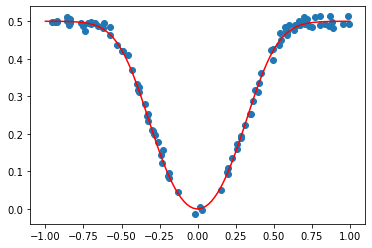

In [2]:
#
# Data generating function
# - this is the function we will try to learn
# - Nothing to do here for you :)

# for simplicity we operate in the interval [-1,1]
def get_random_x(num_x):
    x = np.random.rand(num_x)*2 - 1
    return x

# real function we want to approximate
def f_orig(x):
    return 1.0/(np.exp(-x*x*10)+1)-0.5

# noisy version of original function
def f_noisy(x, s=0.01):
    d = len(x)
    return f_orig(x) + np.random.randn(d)*s 


# plot noisy and original function
x_r = get_random_x(100)
y_ = f_noisy(x_r)
x = np.linspace(-1,1,100)
y = f_orig(x)

plt.plot(x_r,y_,'o') # noisy
plt.plot(x,y,'r') # original
plt.show()

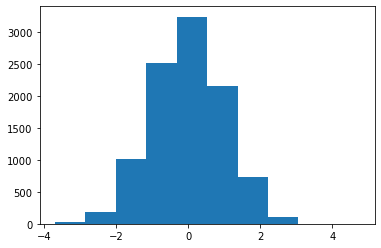

In [3]:
# This is the initialization function for our weights
# Nothing to do here for you :)
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

X = truncated_normal(mean=0, sd=1, low=-10, upp=10)
plt.hist(X.rvs(10000))
plt.show()

### 1) Implement the sigmoid activation function!

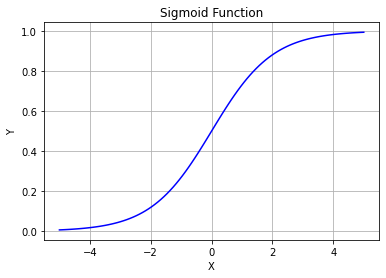

In [4]:
# TODO: implement the sigmoid activation function!
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
activation_function = sigmoid

# the code below plots your implementation.
X = np.linspace(-5, 5, 100)
plt.plot(X, sigmoid(X),'b')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sigmoid Function')
plt.grid()
plt.show()

### 2) Implement the mean squared error loss function!

In [5]:
# TODO: implement the mean squared loss function!
#       fx is your network output, y is the real value
def mse_loss(fx,y):
    return ((fx - y)**2).mean()

### 3) Complete the ANN implementation

In [6]:
# TODO: implement parts of some methods
class NeuralNetwork:
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate
                ):  
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate
        # biases are initialized to 0
        self.b1 = np.zeros((no_of_hidden_nodes,1))
        self.b2 = 0
        # init weights
        self.w1 = None
        self.w2 = None
        self.create_weight_matrices()
        # we will also store the gradients
        self.dw1 = None
        self.dw2 = None
        self.db1 = None
        self.db2 = None
        
    
    def set_learning_rate(self, new_lr):
        self.learning_rate = new_lr
    
    def create_weight_matrices(self):
        """ Method to initialize the weight matrices of the ANN"""
        
        parameter = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-parameter, upp=parameter)
        self.w1 = X.rvs((self.no_of_hidden_nodes, self.no_of_in_nodes))
        parameter = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-parameter, upp=parameter)
        self.w2 = X.rvs((self.no_of_out_nodes, self.no_of_hidden_nodes))
        
        
    
    # TODO: implement the forward pass!
    def forward_pass(self, x):
        """ Method to propagate through the network"""
        
        # code starts here
        fx = self.w2 @ sigmoid(self.w1 * x + self.b1) + self.b2
        return fx
    
    
    # TODO: implement the backward pass (i.e. calculate the gradients)!
    #       Use the calculations from Task 2.
    #       Attention! Make sure the gradient dimensions fit that of the parameters!
    def backward_pass(self, fx, y, x ):
        """ Calculate derivatives w.r.t. weights"""
        # TODO: implement the backward pass
        s = sigmoid(self.w1 * x + self.b1)
        d1 = fx - y
        #d2 = self.w2.T * (s * (1 - s))
        d2 = self.w2.T * (s * (np.identity(1) - s))
        
        # calc gradient for w1 and store it into self.dw1
        # code starts here
        self.dw1 = d1 * (d2 * x.T) # this should be the last line for dw1
        
        # calc gradient for w2 and store it into self.dw2
        # code starts here
        self.dw2 = d1 * s.T # this should be the last line for dw2
        
        # calc gradient for b1 and store it into self.db1
        # code starts here
        self.db1 = d1 * d2 # this should be the last line for db1
        
        # calc gradient for b2 and store it into self.db2
        # code starts here
        self.db2 = d1 # this should be the last line for db2
        
        
        
    # TODO: update the parameters (be careful, check the dimensions!)   
    def update(self):
        self.w1 = self.w1 - self.learning_rate * self.dw1
        self.w2 = self.w2 - self.learning_rate * self.dw2
        self.b1 = self.b1 - self.learning_rate * self.db1
        self.b2 = self.b2 - self.learning_rate * self.db2
        

In [7]:
# NOTHING TO DO FOR YOU, EXCEPT: IT SHOULD RUN WITH YOUR IMPLEMENTATION!
# (except: data types could change in comparison to my implementation. 
#          You can addapt the main loop accordingly. )

# We create an instance of our neural network class
# Lets start with 5 hidden nodes and a learning rate of 1
# You can experiment with both, but the above setting should work
simple_network = NeuralNetwork(no_of_in_nodes=1, 
                               no_of_out_nodes=1, 
                               no_of_hidden_nodes=5,
                               learning_rate=1)

# We train with 10000 data points from the noisy function
n = 10000
x = get_random_x(n)
y = f_noisy(x) # Changed here

# in every epoch we shuffle the data set
def shuffle(x,y):
    # get random indices
    n = len(x)
    idx = np.array(range(n))
    np.random.shuffle(idx)
    x = x[idx]
    y = y[idx]
    return x,y 
    

loss = []
l = None
# Here the actual magic is happening. We train the ANN for two epochs.
# That means the ANN uses the full data set two times
for epoch in range(2):
    # get current learning rate (for printing and addapting)
    lr = simple_network.learning_rate
    # shuffle data
    x,y = shuffle(x,y)
    # iterate over all training samples
    for i, xi in enumerate(x):
        # forward pass
        fx= simple_network.forward_pass(xi)
        # adjust output format (might be different in your implementation)
        fx = fx.flatten()[0]
        # calculate loss
        l = mse_loss(fx,y[i])
        # track the loss and print current state
        loss.append(l)
        print("\r epoch: %d, i: %d, loss = %f, learning rate: %f " 
              %( epoch, i,l, lr), end="", flush=True)
        # calculate gradients
        simple_network.backward_pass(fx,y[i],xi)
        # update parameters
        simple_network.update()
    # In every epoch we addapt the learning rat
    simple_network.set_learning_rate(lr*0.1)
    print("", flush=True)

 epoch: 0, i: 6473, loss = 0.000692, learning rate: 1.000000 

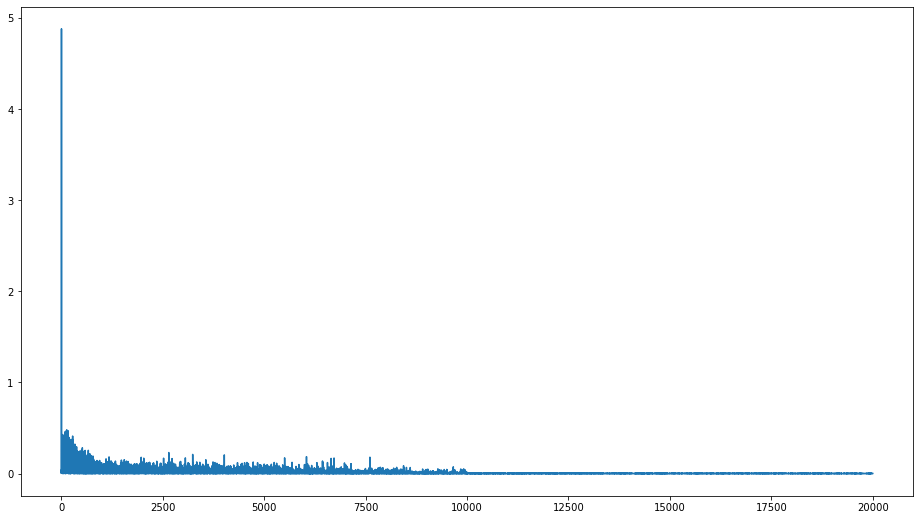

In [8]:
# plot training loss
plt.figure(figsize=(16,9))
plt.clf()
plt.plot(loss)
plt.show()

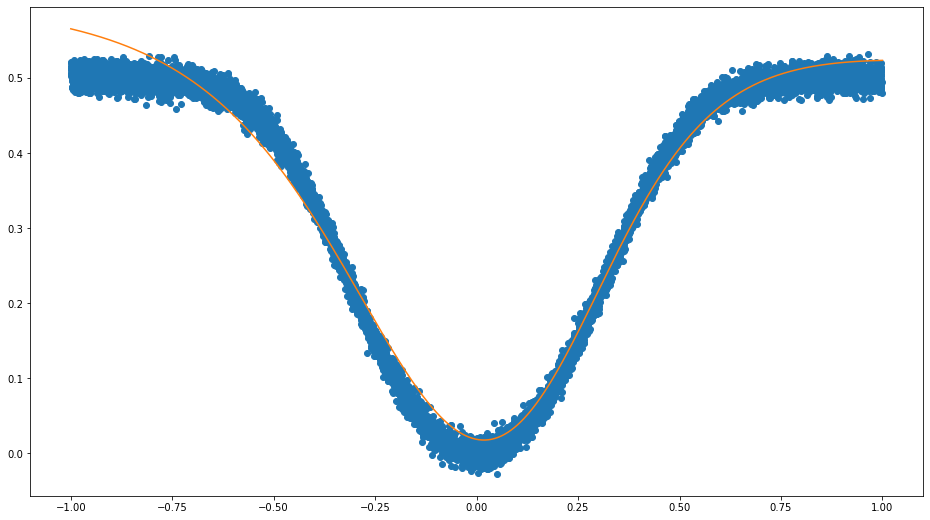

In [9]:
# plot training data and learned function
x_in = np.linspace(-1,1,1000)
fx = []
for xi in x_in:
    fx.append(simple_network.forward_pass(xi)[0][0])
    
plt.figure(figsize=(16,9))
plt.clf()
plt.plot(x,y,'o')
plt.plot(x_in,fx)
plt.show()